# EEP153 Project1 Team Ma Yinchu

Our project focused on analyzing population dynamics and differnces in Africa, drawing on inspiration from Nunn's research on the long term impacts of slavery. Our project goals include:
- Comparing population dynamics over time and against different regions within Africa 
- Comparing economic indicators for these same regions over time

In [1]:
## Install and Import Packages used in this project
!pip install wbdata
!pip install plotly
!pip install cufflinks
!pip install geopandas

import wbdata
import numpy as np
import pandas as pd
import geopandas as gpd
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
cf.go_offline()

## Project Deliverables 

### [#A] Population Statistics
A `python` function named population
that will deliver information to
answer the queries of the following
form:
> In [year] how many
[people/males/females] aged [low] to
[high] were living in [the
world/region/country]?

In [2]:
def population_helper(sex, age_range):
    """Takes
    - sex: a string, can be Male, Female or People
    - age_range: a tuple
    Return a dictionary of indicators with labels
    """
    
    # construct a list of age-ranges
    age_ranges = []
    for i in range(0,80,5):
        if i >= age_range[0] and i + 4 <= age_range[1]:
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
        if (i <= age_range[0] <= i + 4) or (i <= age_range[1] <= i + 4):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    if age_range[1] >= 80:
        age_ranges.append("80UP")
    
    # construct a dictionary of indicators, with labels, that we want to grab
    male = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    female = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    combined = {**male, **female}
    sex_dict = {'Male':male,'Female':female,'People':combined}
    return age_ranges,sex_dict[sex]

In [3]:
def population(year, sex, age_range, place):
    """ Takes
    - year: int
    - sex: str, Male/Female/People
    - age_range: tuple
    - place: str, a three letter code
    Return population given conditions above
    """

    # construct a dataframe, indexed by date, with population counts for each indicator, filtered by `place`
    variables = population_helper(sex, age_range)[1]
    df = wbdata.get_dataframe(variables, country=place)
    
    # sum all the desired population counts
    population_sum = sum(df.filter(items = [str(year)], axis=0).iloc[0])
    
    print(f"In {year} there were {population_sum} {sex}s aged {age_range[0]} to {age_range[1]} that were living in {place}.")
    
    return population_sum

Ex. In 2020, how many females aged 16 to 49 were living in Africa in 2020?

In [4]:
answer = population(2020, 'Female', (16, 49), 'AFE')

In 2020 there were 166394541.0 Females aged 16 to 49 that were living in AFE.


### [#A] Population DataFrames

A function that returns a `pandas` DataFrame
indexed by Region or Country and Year, with
columns giving counts of people in different
age-sex groups.

In [5]:
def population_df(region):
    """Takes in 3 letter country code and returns a pandas DataFrame indexed by region and date, 
    with columns giving counts of people in different age-sex groups."""
    
    # Get population data for region input
    variable_labels = population_helper(sex='People',age_range=(0,100))[1]
    df = wbdata.get_dataframe(variable_labels, country = region)
    
    # Format DF and indices
    df.reset_index(inplace = True)
    df["Region"] = region
    df["date"] = df["date"].astype(int)
    df.set_index(["Region", "date"], inplace = True)
    return df

In [6]:
## Ex. Population dataframe for Africa
pop_df_afe = population_df("AFE")
pop_df_afe

Males 0004  Males 0509  Males 1014  Males 1519  Males 2024  \
Region date                                                               
AFE    2021  54474934.0  48590005.0  43631748.0  37645093.0  32077598.0   
       2020  53461851.0  47709312.0  42575598.0  36563052.0  31250943.0   
       2019  52445829.0  46830488.0  41476275.0  35526881.0  30439607.0   
       2018  51462324.0  45959995.0  40339961.0  34553287.0  29672727.0   
       2017  50527950.0  45048010.0  39194652.0  33610378.0  28956812.0   
...                 ...         ...         ...         ...         ...   
       1964  13473056.0  10457881.0   8700624.0   7371925.0   6056915.0   
       1963  13062183.0  10138780.0   8455835.0   7145770.0   5879098.0   
       1962  12661185.0   9837633.0   8228078.0   6916635.0   5725665.0   
       1961  12271309.0   9547953.0   8020790.0   6684830.0   5586353.0   
       1960  11903046.0   9269956.0   7827606.0   6464521.0   5452406.0   

             Males 2529  Males 3034  Males 3539  Males 4044  Males 4549  ...  \
Region date                                                              ...   
AFE    2021  27554198.0  23787250.0  19836395.0  15770587.0  12307798.0  ...   
       2020  26824252.0  23186536.0  19161081.0  15076634.0  11954285.0  ...   
       2019  26157013.0  22540445.0  18485600.0  14415738.0  11620415.0  ...   
       2018  25565705.0  21859093.0  17803395.0  13828439.0  11294381.0  ...   
       2017  25005637.0  21167835.0  17103010.0  13331062.0  10961721.0  ...   
...                 ...         ...         ...         ...         ...  ...   
       1964   5140702.0   4429617.0   3793506.0   3196747.0   2634712.0  ...   
       1963   5026028.0   4340514.0   3713247.0   3127933.0   2575964.0  ...   
       1962   4918510.0   4253645.0   3635546.0   3060163.0   2520717.0  ...   
       1961   4814153.0   4166589.0   3558274.0   2992955.0   2465607.0  ...   
       1960   4713060.0   4079665.0   3483816.0   2929035.0   2416431.0  ...   

             Females 3539  Females 4044  Females 4549  Females 5054  \
Region date                                                           
AFE    2021    20373836.0    16114329.0    12840580.0    10928926.0   
       2020    19607075.0    15395913.0    12524773.0    10625703.0   
       2019    18847517.0    14730960.0    12243730.0    10298215.0   
       2018    18101141.0    14153659.0    11978368.0     9960406.0   
       2017    17350716.0    13678514.0    11705198.0     9626161.0   
...                   ...           ...           ...           ...   
       1964     3908192.0     3255916.0     2680389.0     2196325.0   
       1963     3808828.0     3174922.0     2612835.0     2143589.0   
       1962     3714069.0     3095416.0     2550083.0     2092686.0   
       1961     3622726.0     3017904.0     2489122.0     2043161.0   
       1960     3535856.0     2944196.0     2433461.0     1997927.0   

             Females 5559  Females 6064  Females 6569  Females 7074  \
Region date                                                           
AFE    2021     8791191.0     6828373.0     5147052.0     3599557.0   
       2020     8505650.0     6613487.0     5007885.0     3491072.0   
       2019     8217134.0     6396462.0     4848496.0     3362927.0   
       2018     7931174.0     6185332.0     4677211.0     3224304.0   
       2017     7652897.0     5991427.0     4509749.0     3086225.0   
...                   ...           ...           ...           ...   
       1964     1777026.0     1387855.0     1007921.0      672056.0   
       1963     1734161.0     1349018.0      983494.0      655650.0   
       1962     1693058.0     1311157.0      960546.0      640343.0   
       1961     1652159.0     1275145.0      938330.0      626362.0   
       1960     1611564.0     1242066.0      916159.0      614569.0   

             Females 7579  Females 80UP  
Region date                              
AFE    2021     2207210.0     1909063.0  
       2020     213176

### [#B] Population Pyramids

A `python` function that takes as
input a `pandas` DataFrame with
columns providing counts of people by
age-sex groups, and constructs a
“population pyramid” graph for
visualizing the data.

In [7]:
def population_pyramid(df, year):
    """ Takes
    `df` a dataframe indexed by region and year, with columns''
    `year` an int
    """
    
    py.init_notebook_mode(connected=True)
    
    # reset dataframe index to date/year
    df2 = df.reset_index(level='Region', drop=True)
    
    age_ranges = population_helper('People',(0,100))[0]


    layout = go.Layout(yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                       xaxis=go.layout.XAxis(title='Number'),
                       title="Population Pyramid for Africa in 2020",
                       barmode='overlay',
                       bargap=0.0)

    data = [go.Bar(y=[int(s[:2])+1 for s in age_ranges],
               x=df2.loc[year,:].filter(regex="M").values,
               orientation='h',
               name='Male',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=[int(s[:2])+1 for s in age_ranges],
               x=-df2.loc[year,:].filter(regex="F").values,
               orientation='h',
               name='Female',
               hoverinfo='x',
               marker=dict(color='mediumpurple')
               )]
    
    py.iplot(dict(data=data, layout=layout))
    
    return data


In [8]:
## Ex. Population pyramid for Africa in 2020
pop_pyramid_afe_data = population_pyramid(pop_df_afe, 2020)

### [#C] Animated Population Pyramids 

Expected: A `python` function that takes as
input a `pandas` DataFrame with
columns providing counts of people by
age-sex groups, with rows
corresponding to different years, and
constructs an animated “population
pyramid” graph for visualizing how the
population changes over time.

Actual: A demo of an animated population pyramid

In [11]:
# Get Afircan Population Dataframe
age_ranges,variables = population_helper(sex='People',age_range=(0,100))
df = wbdata.get_dataframe(variables, country="AFE", cache = False)
df

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2021,54474934.0,48590005.0,43631748.0,37645093.0,32077598.0,27554198.0,23787250.0,19836395.0,15770587.0,12307798.0,...,20373836.0,16114329.0,12840580.0,10928926.0,8791191.0,6828373.0,5147052.0,3599557.0,2207210.0,1909063.0
2020,53461851.0,47709312.0,42575598.0,36563052.0,31250943.0,26824252.0,23186536.0,19161081.0,15076634.0,11954285.0,...,19607075.0,15395913.0,12524773.0,10625703.0,8505650.0,6613487.0,5007885.0,3491072.0,2131769.0,1872417.0
2019,52445829.0,46830488.0,41476275.0,35526881.0,30439607.0,26157013.0,22540445.0,18485600.0,14415738.0,11620415.0,...,18847517.0,14730960.0,12243730.0,10298215.0,8217134.0,6396462.0,4848496.0,3362927.0,2048886.0,1814665.0
2018,51462324.0,45959995.0,40339961.0,34553287.0,29672727.0,25565705.0,21859093.0,17803395.0,13828439.0,11294381.0,...,18101141.0,14153659.0,11978368.0,9960406.0,7931174.0,6185332.0,4677211.0,3224304.0,1967877.0,1750682.0
2017,50527950.0,45048010.0,39194652.0,33610378.0,28956812.0,25005637.0,21167835.0,17103010.0,13331062.0,10961721.0,...,17350716.0,13678514.0,11705198.0,9626161.0,7652897.0,5991427.0,4509749.0,3086225.0,1894203.0,1688213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,13473056.0,10457881.0,8700624.0,7371925.0,6056915.0,5140702.0,4429617.0,3793506.0,3196747.0,2634712.0,...,3908192.0,3255916.0,2680389.0,2196325.0,1777026.0,1387855.0,1007921.0,672056.0,388984.0,268313.0
1963,13062183.0,10138780.0,8455835.0,7145770.0,5879098.0,5026028.0,4340514.0,3713247.0,3127933.0,2575964.0,...,3808828.0,3174922.0,2612835.0,2143589.0,1734161.0,1349018.0,983494.0,655650.0,382154.0,263206.0
1962,12661185.0,9837633.0,8228078.0,6916635.0,5725665.0,4918510.0,4253645.0,3635546.0,3060163.0,2520717.0,...,3714069.0,3095416.0,2550083.0,2092686.0,1693058.0,1311157.0,960546.0,640343.0,375946.0,258394.0


In [12]:
# Create initial pyramid
year = 1960
data = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
           y = [int(s[:2])+1 for s in age_ranges],
           orientation='h',
           name='Men',
           marker=dict(color='green'),
           hoverinfo='skip'
           ),
    go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
           y=[int(s[:2])+1 for s in age_ranges],
           orientation='h',
           name='Women',
           marker=dict(color='pink'),
           hoverinfo='skip',
           )
    ]


In [13]:
# create a layout with our title 
layout = go.Layout(barmode='overlay',
               yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
               xaxis=go.layout.XAxis(title='Number'))


In [14]:
# combine the graph_objects into a figure
fig = go.Figure(data=data)

In [15]:
# to see what we have so far
fig.show()

In [16]:
# create a list of frames
frames = []

# create a frame for every line y
for year in df.index.sort_values():
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='green'),
               hoverinfo='skip'
               ),
        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
    
    # create the button
    button = {
        "type": "buttons",
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [None, {"frame": {"duration": 20}}],
            }
        ],
    }
    
    # add the button to the layout and update the 
    # title to show the gradient descent step
    layout = go.Layout(updatemenus=[button], 
                       title_text=f"Population Pyramid for {year}")
    
    # create a frame object
    frame = go.Frame(
        data= bins, 
        layout=go.Layout(title_text=f"Population Pyramid for {year}")
    )
    
    # add the frame object to the frames list
    frames.append(frame)

In [17]:
# combine the graph_objects into a figure
fig = go.Figure(data=data,
                frames=frames,
                layout = layout)
                                 
# show our animation!
fig.show()

### [#C] Population Maps

A Jupyter notebook which queries a population database and provides visualizations in the form of maps. An example of a library that may be useful is [geopandas](https://geopandas.org/en/stable/).

In [18]:
def plot_map(variable):
    # Read Shapefile of Africa Boundaries
    fp = "Africa_Boundaries/Africa_Boundaries.shp"
    map_df = gpd.read_file(fp)
    
    # Get most recent data on population or GDP per capita, and merge with geographical locations
    variable_labels = {"Population":{"SP.POP.TOTL":"Population"},
                       "GDP Per Capita":{"NY.GDP.PCAP.CD":"GDP per capita"}}
    african_countries_code = list(map_df['ISO'])
    all_countries_code = list(pd.DataFrame(wbdata.get_country())['id'])
    intersection = list(set(african_countries_code) & set(all_countries_code))
    africa = wbdata.get_dataframe(variable_labels[variable], country = intersection).squeeze().unstack('country')
    africa = africa.loc[['2021']].T.reset_index()
    africa = africa.merge(pd.DataFrame(wbdata.get_country()),how='left',left_on='country',right_on='name')
    africa = africa[['country','2021','id']]
    merged = map_df.merge(africa,how='left',left_on='ISO',right_on='id')
    merged.dropna(subset=['2021'],inplace=True)
    
    # Plot Map
    merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
    merged['coords'] = [coords[0] for coords in merged['coords']]
    fig, ax = plt.subplots(figsize = (30,30))
    ax.set_title(variable+' Distribution Map', fontdict={'fontsize': '30', 'fontweight' : '3'})
    merged.plot(column='2021', ax=ax, cmap='OrRd', legend=True)
    for idx, row in merged.iterrows():
        plt.annotate(text=row['id'], xy=row['coords'],horizontalalignment='center',size=15)

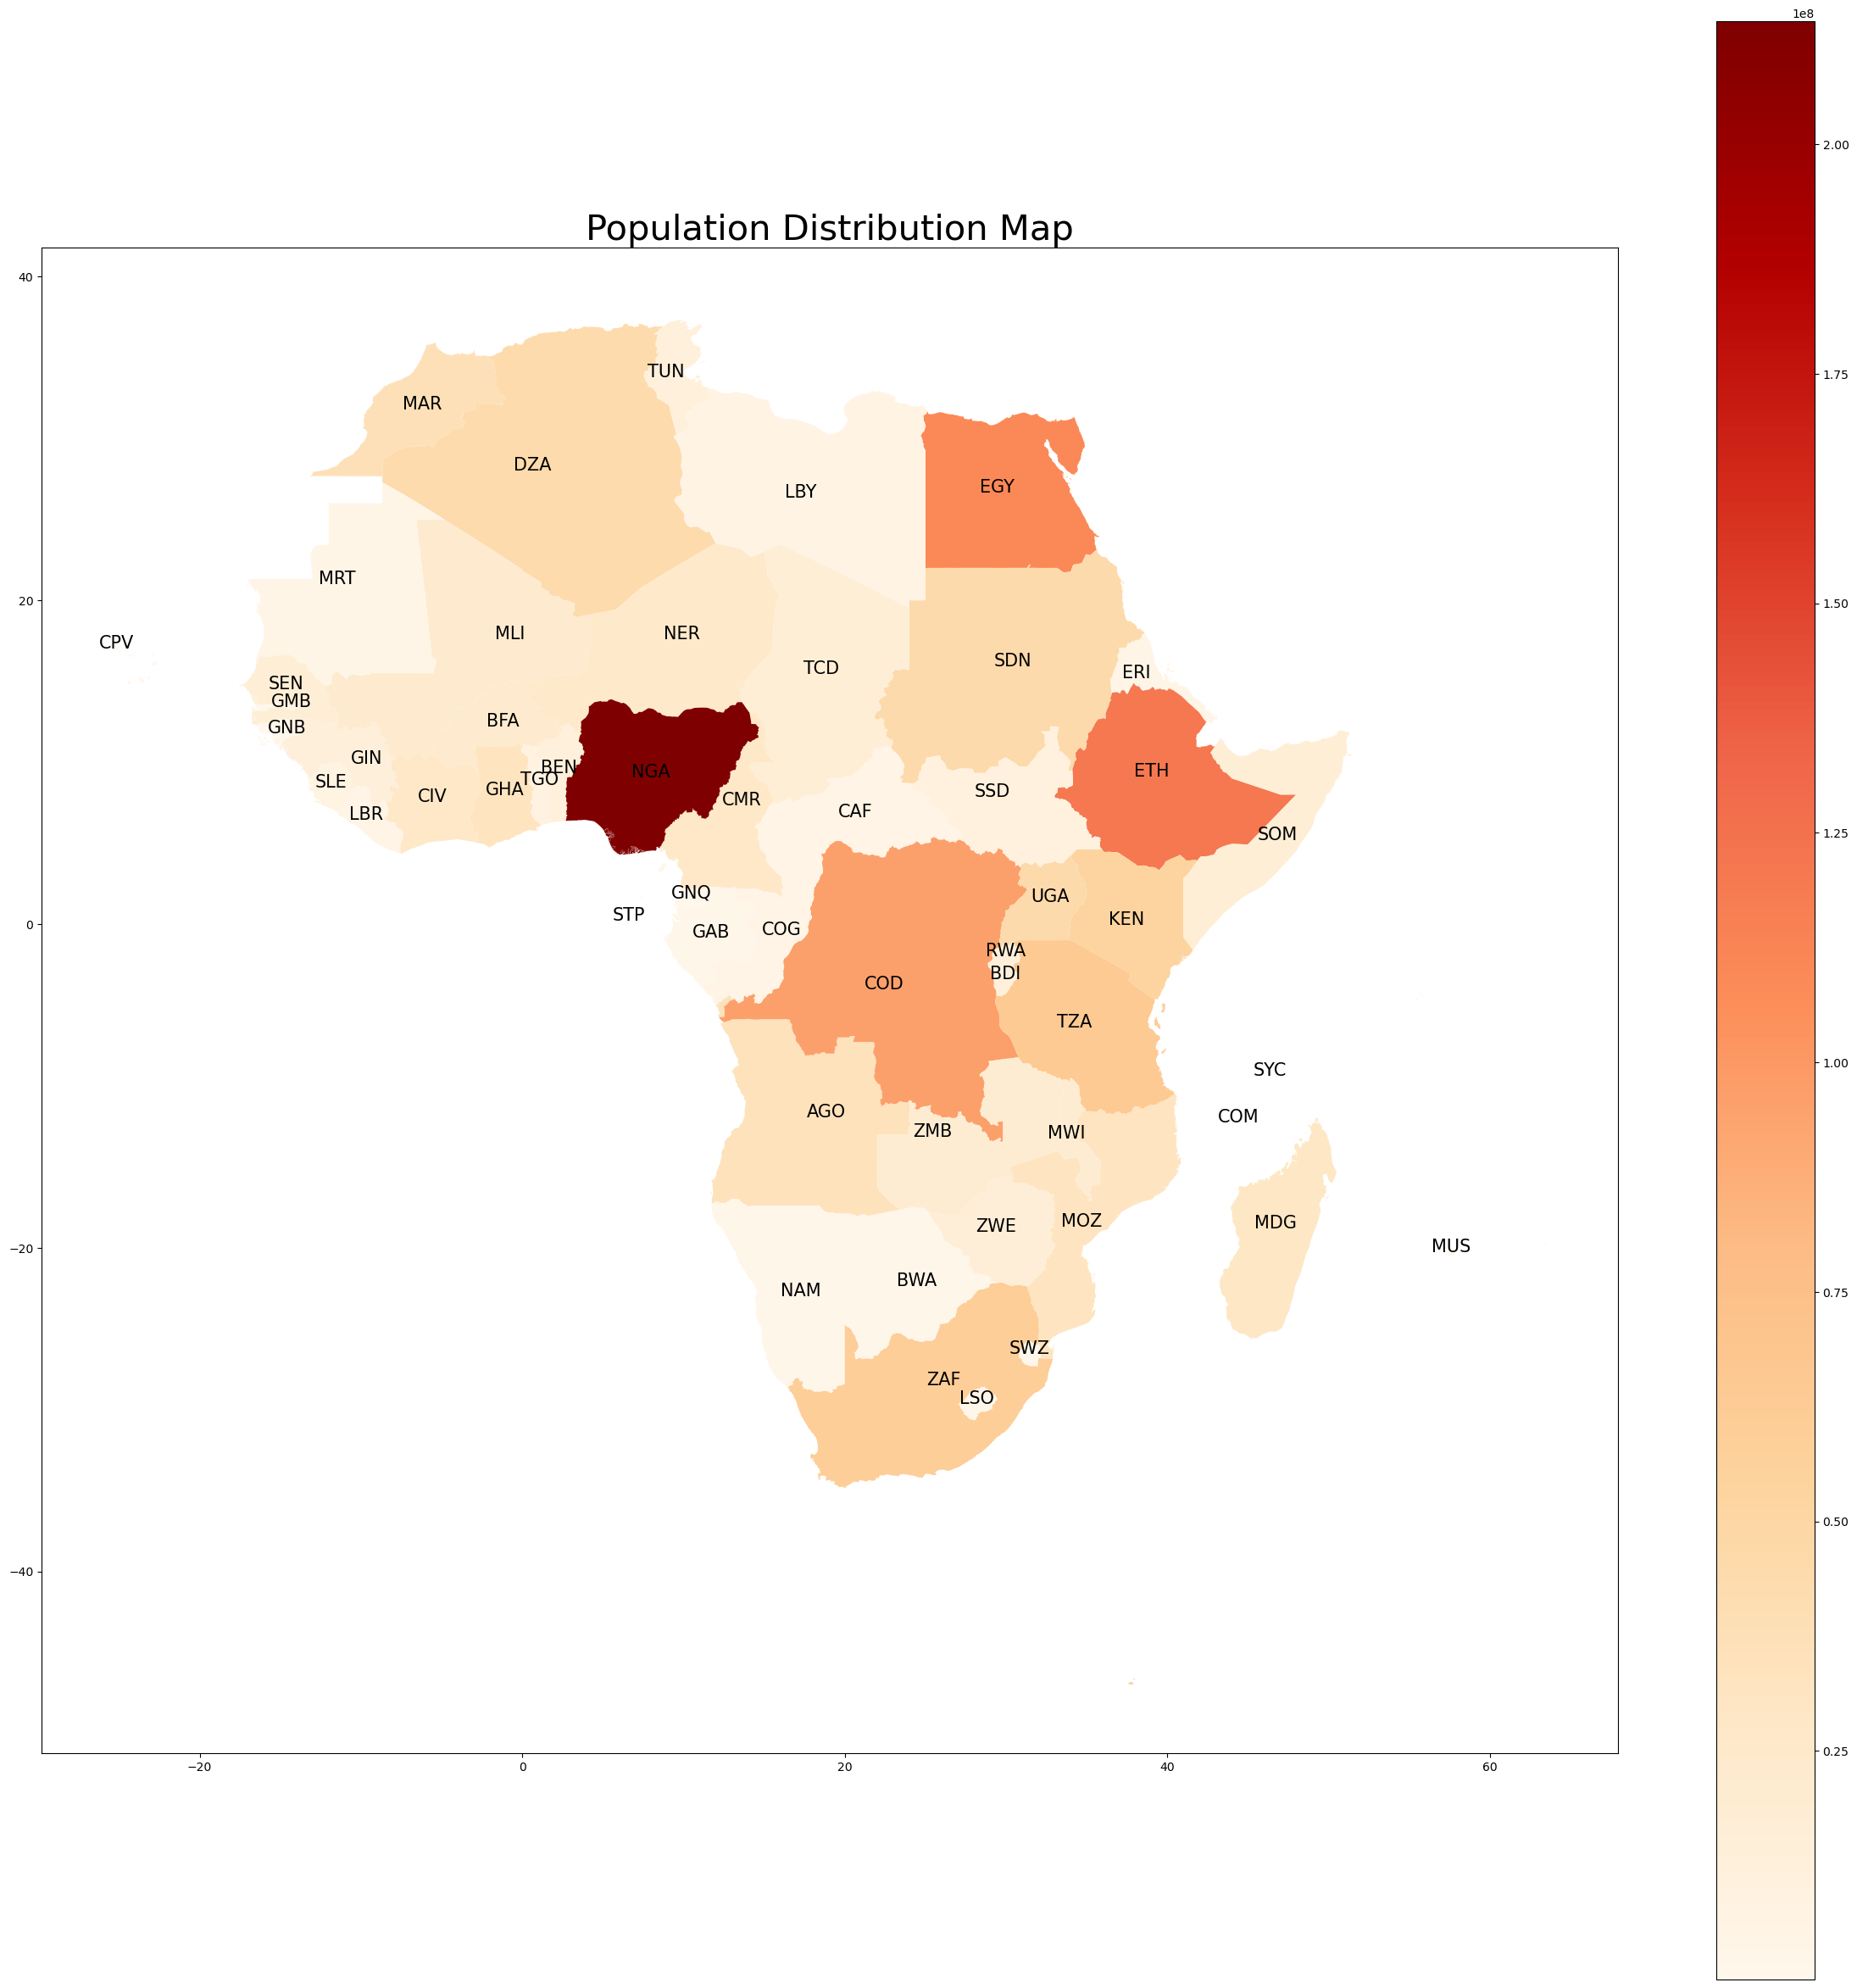

In [19]:
# Plot population distribution map
plot_map('Population')

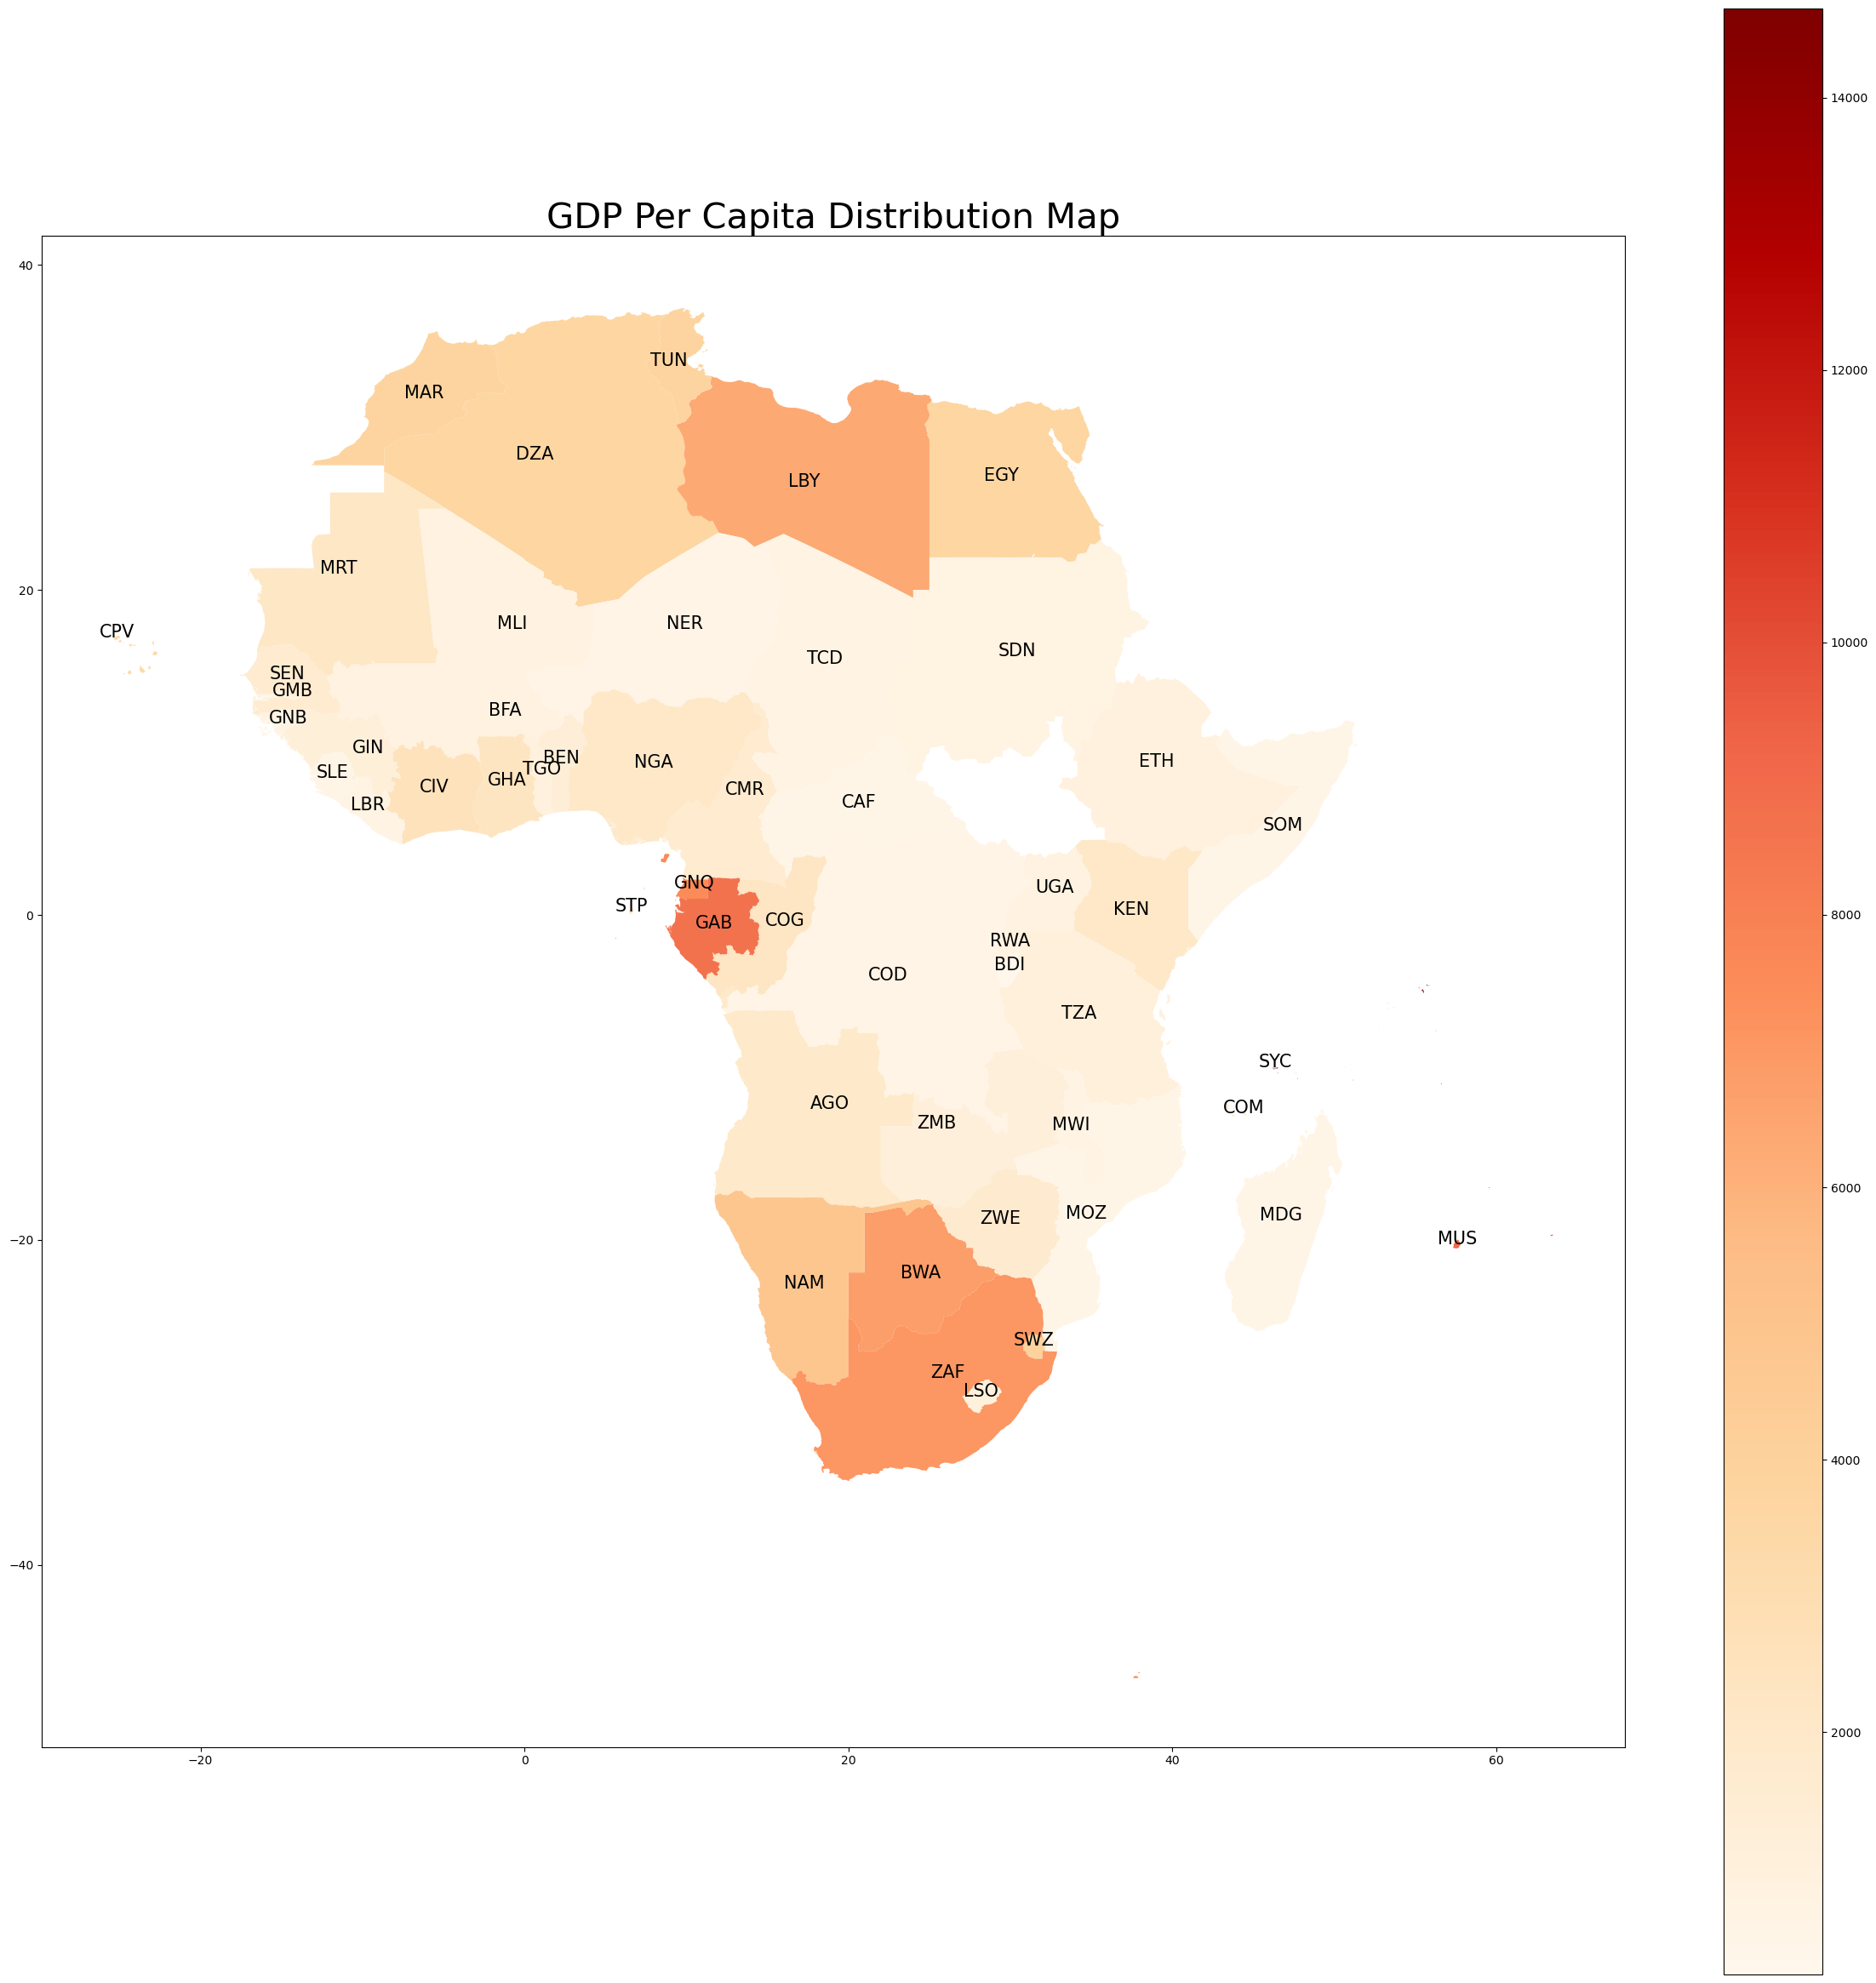

In [20]:
# Plot population distribution map
plot_map('GDP Per Capita')

### [#C] Agricultural Supply

In [21]:
pd.options.plotting.backend = "plotly"

def pop_plt(indicators, countries):
    """ Function that takes in a list of countries/regions,
    a population indicator, and outputs a line plot of population growth. """
    
    # Get indicators and country data of interest
    data = wbdata.get_dataframe(indicators, country = countries)
    
    # Format df
    data.reset_index(inplace=True)
    data['date'] = data['date'].astype(int)
    data.set_index(['country'],inplace=True)
    
    # Make scatterplot
    plot = data.plot.line(
        x= "date",
        y= "Population",
        color = data.index,
        title = "Population")
    return plot

population_var = {"SP.POP.TOTL":"Population"}
regions = ["AFW", "AFE"]

pop_plt(population_var,regions)

In [22]:
import_export_var = {
    "TM.VAL.AGRI.ZS.UN":"Agricultural imports",
    "TX.VAL.AGRI.ZS.UN":"Agricultural exports"
    }

In [23]:
def imp_plt(indicators, countries):
    """ Function that takes in a list of countries/regions,
    a population indicator, and outputs a line plot of import growth. """
    
    # Get indicators and country data of interest
    data = wbdata.get_dataframe(indicators, country = countries)
    
    # Query year of interest
    data.reset_index(inplace=True)
    data['date'] = data['date'].astype(int)
    data.set_index(['country'],inplace=True)
    
    # Make scatterplot
    plot_i = data.plot.line(
        x= "date",
        y= "Agricultural imports",
        color = data.index,
        title = "Africa Agricultural raw materials imports (% of merchandise imports)")
    return plot_i

imp_plt(import_export_var, regions)

In [24]:
def exp_plt(indicators, countries):
    """ Function that takes in a list of countries/regions,
    a population indicator, and outputs a line plot of export growth. """
    
    # Get indicators and country data of interest
    data = wbdata.get_dataframe(indicators, country = countries)
    
    # Query year of interest
    data.reset_index(inplace=True)
    data['date'] = data['date'].astype(int)
    data.set_index(['country'],inplace=True)
    
    # Make scatterplot
    plot_e = data.plot.line(
        x= "date",
        y= "Agricultural exports",
        color = data.index,
        title = "Africa Agricultural raw materials exportss (% of merchandise imports)")
    return plot_e

exp_plt(import_export_var, regions)

In [25]:
gdp_vars = {"NY.GDP.PCAP.CD":"GDP per capita"}
def gdp_plt(indicators, countries):
    """ Function that takes in a list of countries/regions,
    a population indicator, and outputs a line plot of GDP per capita. """
    
    # Get indicators and country data of interest
    data = wbdata.get_dataframe(indicators, country = countries)
    
    # Query year of interest
    data.reset_index(inplace=True)
    data['date'] = data['date'].astype(int)
    data.set_index(['country'],inplace=True)
    
    # Make scatterplot
    plot_g = data.plot.line(
        x= "date",
        y= "GDP per capita",
        color = data.index,
        title = "Africa GDP per capita")
    return plot_g

gdp_plt(gdp_vars, regions)